**Mengimport Library**

In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import KFold

**Preview Dataset**

In [192]:
data = pd.read_csv("C:/Datasets/titanic.csv") #Membuka dataset titanic ke dalam variabel data

data.info() #Menampilkan informasi dataset
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Data Cleaning**

In [193]:
data.isnull().sum() #Mengecek missing value di dataset

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Mengisi Missing Value**

**Kolom Embarked**  

Missing value di kolom embarked diisi dengan nilai yang tampil paling banyak (modus)

In [194]:
data['Embarked'].isnull().sum() #Mengecek missing value di kolom embarked

2

In [195]:
modus_embarked = data['Embarked'].mode()[0] #Mengetahui modus di kolom embarked
modus_embarked

'S'

In [196]:
data['Embarked'] = data['Embarked'].fillna(modus_embarked) #Mengisi missing value di kolom embarked dengan modus kolom embarked

In [197]:
data['Embarked'].isnull().sum() #Mengecek missing value di kolom embarked

0

**Kolom Age**

Missing value di kolom Age diisi dengan nilai rata-rata dari umur penumpang (mean)

In [198]:
data['Age'].isnull().sum() #Mengecek missing value di kolom Age

177

In [199]:
rata_umur = round(data['Age'].mean()) #Mengetahui mean di kolom Age
rata_umur

30

In [200]:
data['Age'] = data['Age'].fillna(rata_umur) #Mengisi missing value di kolom Age dengan modus kolom Age

In [201]:
data['Age'].isnull().sum() #Mengecek missing value di kolom Age

0

**Kolom Cabin**

In [202]:
data=data.drop(columns=['Cabin'], axis=1) #Memiliki terlalu banyak null maka dihapus

In [203]:
data.drop_duplicates(inplace=True) #Menghapus data duplikasi di dataset

In [204]:
data.isnull().sum() #Mengecek missing value di dataset

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**Mengubah Data ke Numberik**

**Kolom Sex**

In [205]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [206]:
sex_map = {'male' : 1, 'female' : 0} #Mengubah data male dan female menjadi binary 0 dan 1
data['Sex'] = data['Sex'].map(sex_map)

In [207]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


**Kolom Embarked**

In [208]:
embarked = data[['Embarked']]
dummies = pd.get_dummies(embarked, dtype=int) #Membagi kolom embarked ke dalam masing masing kategori dengan nilai 0 dan 1
dummies.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [209]:
data = pd.merge(data.reset_index(), dummies.reset_index()) #Menggabungkan data dummies dengan data utama
data.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,0,0,1
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,1,0,0
2,2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,0,0,1
4,4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,0,0,1


In [210]:
data = data.drop(['index','Embarked'], axis=1) #Menghapus kolom index dan embarked
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,1


In [211]:
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.' , expand = False) #Mengambil title/gelar pada nama penumpang

In [212]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,0,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,1,Mr


In [213]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 } 
#Mengubah data title/gelar ke dalam bentuk numerik

data['Title'] = data['Title'].map(title_mapping)

In [214]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,0,0,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,0,1,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,1,0


**Membagi Data**

In [215]:
hapus_kolom = ['PassengerId', 'Name', 'Ticket','Survived'] 
X = data.drop(columns=hapus_kolom, axis=1) #Menghapus kolom yang tidak diperlukan sebagai data fitur
y = data['Survived'] #Mengambil kolom survived sebagai data label

#Membagi data fitur(X) dan data label(y) menjadi data train dan test dengan data test sebesar 20% dari data train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [216]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
709,3,1,30.0,1,1,15.2458,1,0,0,3
439,2,1,31.0,0,0,10.5000,0,0,1,0
840,3,1,20.0,0,0,7.9250,0,0,1,0
720,2,0,6.0,0,1,33.0000,0,0,1,1
39,3,0,14.0,1,0,11.2417,1,0,0,1


**Pemodelan Decision Tree**

In [217]:
model = DecisionTreeClassifier(random_state=42) #Membuat model decision tree
model.fit(X_train, y_train) #Training model

DecisionTreeClassifier(random_state=42)

**Visualisasi Decision Tree**

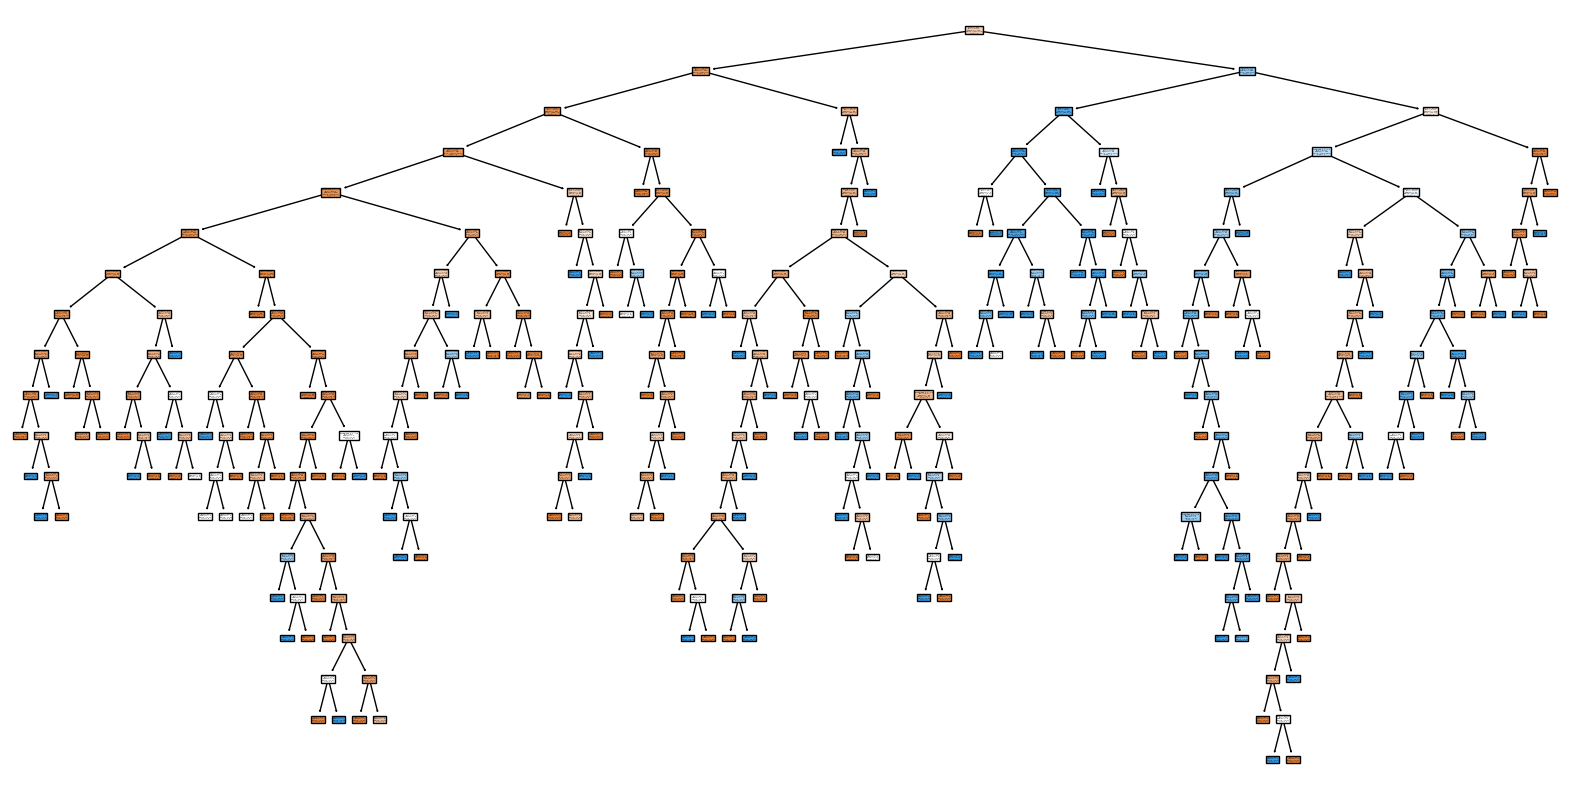

In [218]:
plt.figure(figsize=(20,10))
tree.plot_tree(model, feature_names=X.columns, class_names=[str(i) for i in sorted(y.unique())], filled=True)
plt.show() #Menampilkan model decision tree

**Uji Validasi**

In [219]:
scores = cross_val_score(model, X, y, cv=5) #Menguji menggunakan cross validation 

print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.77094972 0.75842697 0.8258427  0.73033708 0.76404494]
Mean cross-validation score: 0.7699202812127298


**Uji Performa**

In [220]:
y_prediksi = model.predict(X_test) #Memprediksi hasil model training dengan data dari X_test

In [221]:
print("Accuracy:", accuracy_score(y_test, y_prediksi))
print("Classification Report:\n", classification_report(y_test, y_prediksi))

Accuracy: 0.770949720670391
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.80       105
           1       0.72      0.73      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179

